In [1]:
import pandas as pd
df = pd.read_csv(r'E:/Z-Machine Learning/My Work/DataSets/Heart Diseas Detection/datasets_737503_1278636_heart.csv')

In [2]:
y = df['target']
df = df.drop(['target'],axis=1)

In [3]:
import numpy as np 
df = np.array(df)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#df is your data variable for the training data
scaler.fit(df)
df = scaler.transform(df)


In [5]:
xtr = []
xts = []
ytr = []
yts = []

In [6]:
from sklearn.model_selection import train_test_split

xtr, xts, ytr, yts = train_test_split(df, y, test_size=0.2, random_state=42)

In [7]:
xtr = np.array(xtr)
ytr = np.array(ytr)
xts = np.array(xts)
yts = np.array(yts)

In [8]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(13,)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(160, activation='relu'),
    keras.layers.Dense(130, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()
hist = model.fit(xtr, ytr,
          batch_size=14, epochs=55,
          validation_data=(xts, yts))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 13)                0         
_________________________________________________________________
dense (Dense)                (None, 200)               2800      
_________________________________________________________________
dense_1 (Dense)              (None, 160)               32160     
_________________________________________________________________
dense_2 (Dense)              (None, 130)               20930     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 131       
Total params: 56,021
Trainable params: 56,021
Non-trainable params: 0
_________________________________________________________________
Epoch 1/55
18/18 [==============================] - 0s 7ms/step - loss: 0.6141 - acc: 0.6942 - val_loss: 0.4861 - val_

18/18 [==============================] - 0s 2ms/step - loss: 0.0198 - acc: 0.9917 - val_loss: 1.5008 - val_acc: 0.8525


(array([138., 165.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

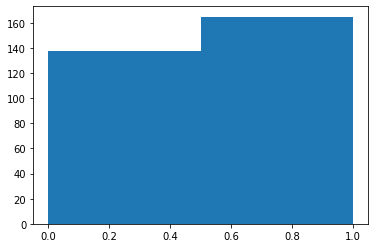

In [9]:
import matplotlib.pyplot as plt
plt.hist(y, bins =2)